In [1]:
# imports !
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cape Grim CO2 Analysis: Tracking Atmospheric Carbon Dioxide Trends

This analysis examines atmospheric CO₂ concentration data from Cape Grim, Tasmania - one of the world's most important baseline air pollution monitoring stations. Located in an area with clean air representing the Southern Hemisphere's background atmospheric composition, this dataset provides critical insights into global carbon dioxide trends over time.

The analysis will explore long-term concentration patterns, seasonal variations, and growth rates to better understand the acceleration of CO₂ accumulation in our atmosphere.

In [68]:
# read the data
df = pd.read_csv('CapeGrim_CO2_data_download.csv')

In [73]:
# check the data
display(df.head())
print(df.info())

,yyyy,mm,dd,date,co2_ppm,sd_ppm,gr_ppm_yr,source
datetime,,,,,,,,
1976-05-15,1976,5,15,1976.3689,328.861,0.165,NaN,in situ
1976-06-15,1976,6,15,1976.4536,328.988,0.285,NaN,in situ
1976-07-15,1976,7,15,1976.5355,329.653,0.282,NaN,in situ
1976-08-15,1976,8,15,1976.6202,330.550,0.201,NaN,in situ
1976-09-15,1976,9,15,1976.7049,330.872,0.234,NaN,in situ


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 588 entries, 1976-05-15 to 2025-04-15
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yyyy       588 non-null    int64  
 1   mm         588 non-null    int64  
 2   dd         588 non-null    int64  
 3   date       588 non-null    float64
 4   co2_ppm    588 non-null    float64
 5   sd_ppm     588 non-null    float64
 6   gr_ppm_yr  576 non-null    float64
 7   source     588 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 41.3+ KB
None


In [70]:
# normalise column names
df.columns = (
    df.columns
      .str.lower()                                    # *lowercase*
      .str.replace(r'\(', '_', regex=True)            # *replace '(' with '_'*
      .str.replace(r'\)', '', regex=True)             # *drop ')'*
      .str.replace(r'\/', '_', regex=True)           # *replace / with '_'*
      .str.strip()                                    # *trim spaces*
      .str.replace(' ', '_')                          # *spaces → underscores*
)

In [71]:
df['datetime'] = pd.to_datetime(dict(
    year  = df['yyyy'],
    month = df['mm'],
    day   = df['dd']
))

df.set_index('datetime', inplace=True)

## Data Preparation

The dataset contains atmospheric CO₂ measurements from Cape Grim, with each record representing a monthly observation. We've performed several preparation steps:

1. Normalized column names for consistency using Python conventions
2. Created a proper datetime index from the year, month, and day columns
3. Examined metadata including measurement sources and identified missing values

This preparation enables time-series analysis and visualization of long-term trends in atmospheric carbon dioxide.

In [72]:
# check soruce column
print(df['source'].value_counts(dropna=False))

# Inspect where GR (or others) is missing
missing = df[df['gr_ppm_yr'].isna()]
print(missing.head())

source
in situ    333
flask      255
Name: count, dtype: int64
            yyyy  mm  dd       date  co2_ppm  sd_ppm  gr_ppm_yr   source
datetime                                                                
1976-05-15  1976   5  15  1976.3689  328.861   0.165        NaN  in situ
1976-06-15  1976   6  15  1976.4536  328.988   0.285        NaN  in situ
1976-07-15  1976   7  15  1976.5355  329.653   0.282        NaN  in situ
1976-08-15  1976   8  15  1976.6202  330.550   0.201        NaN  in situ
1976-09-15  1976   9  15  1976.7049  330.872   0.234        NaN  in situ


### Column Definitions

- **CO₂ (ppm)**  
  *Part-per-million concentration* of carbon dioxide measured at mid-month. Reflects the ambient atmospheric CO₂ level at the sampling site.

- **SD (ppm)**  
  *Standard deviation* of the CO₂ measurements. Indicates the uncertainty or variability in the observed values for that month.

- **GR (ppm/yr)**  
  *Growth rate* of CO₂, expressed in ppm per year. Shows how quickly the concentration is rising or falling, typically calculated as the year-on-year difference.


C:\Users\tj92a\AppData\Local\Temp\ipykernel_22536\2965556886.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(month_labels)


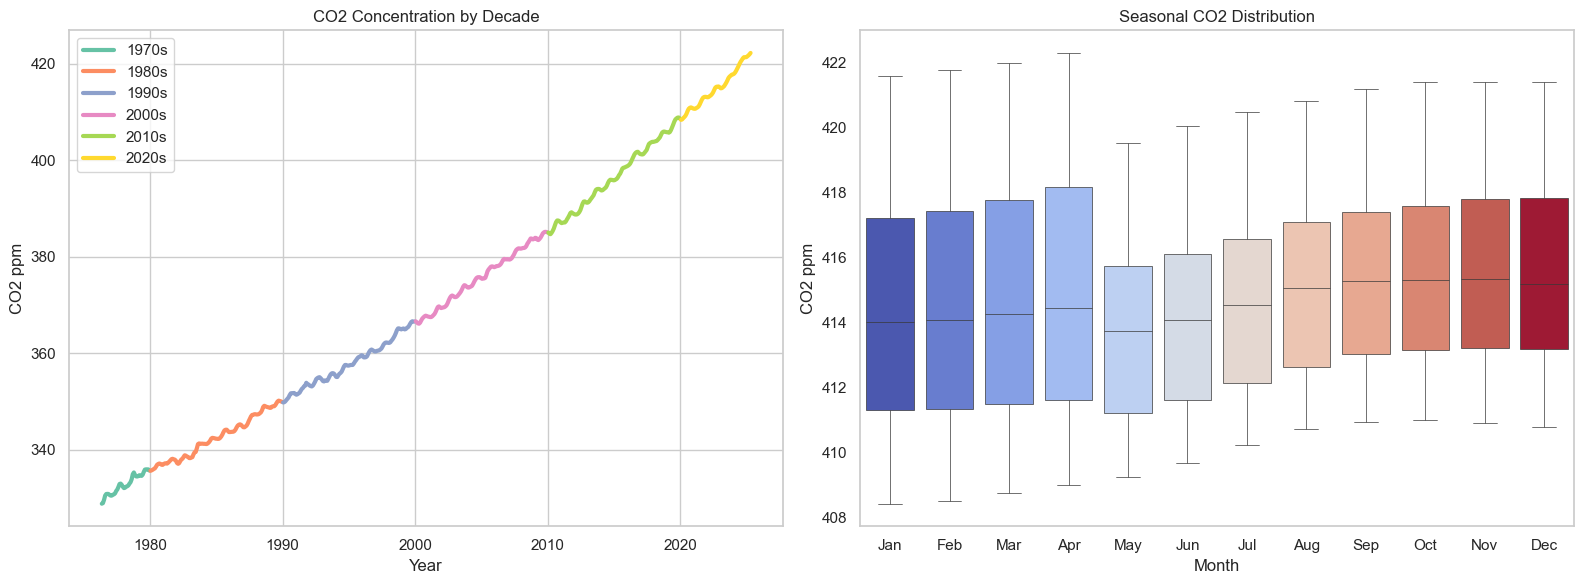

In [104]:
import calendar

# copy dataframe 
data = df.copy()
data = data.dropna(subset=['co2_ppm'])
data['month'] = data.index.month
data['year'] = data.index.year
data['decade'] = (data['year'] // 10) * 10 # decade column

# set seaborn style
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 12)


# Optionally group by decade and color line segments differently
decade_palette = sns.color_palette("Set2", len(data['decade'].unique()))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Timeline grouped by decade
for (decade, data), color in zip(data.groupby('decade'), decade_palette):
    sns.lineplot(ax=axes[0], x=data.index, y=data['co2_ppm'], label=f"{decade}s", color=color, linewidth=3)

axes[0].set_title('CO2 Concentration by Decade')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('CO2 ppm')
axes[0].legend()
axes[0].grid(True)

# Monthly boxplot: neutral color, remove gradient
sns.boxplot(ax=axes[1], x='month', y='co2_ppm', data=data, palette='coolwarm', hue='month', dodge=False, linewidth=0.5, legend=False)
axes[1].set_title('Seasonal CO2 Distribution')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('CO2 ppm')
axes[1].set_xticklabels(month_labels)
axes[1].grid(False)

plt.tight_layout()
plt.show()


## CO₂ Concentration Trends and Seasonality

The visualizations above reveal two critical aspects of atmospheric CO₂ dynamics:

**Left Panel - CO₂ Concentration by Decade:**
This time series visualization highlights the relentless upward trajectory of atmospheric CO₂, color-coded by decade. Several important patterns emerge:

- Each decade shows a consistently higher baseline than the previous one, with no periods of sustained decrease
- The slope appears to be steepening over time, suggesting accelerating accumulation rates
- The distinct color separation between decades visually emphasizes the significant increase from one decade to the next

**Right Panel - Seasonal CO₂ Distribution:**
The monthly boxplot reveals a clear seasonal cycle in CO₂ concentration:

- Higher values in spring months (Northern Hemisphere winter/early spring) reflect reduced photosynthesis activity and increased fossil fuel combustion for heating in the northern hemisphere
- Lower values in autumn months correspond to peak photosynthesis in Northern Hemisphere summer when plants absorb more CO₂
- This natural "breathing" of the planet is superimposed on the long-term increasing trend

While the seasonal cycle causes temporary fluctuations, the long-term trend persistently moves upward regardless of season.

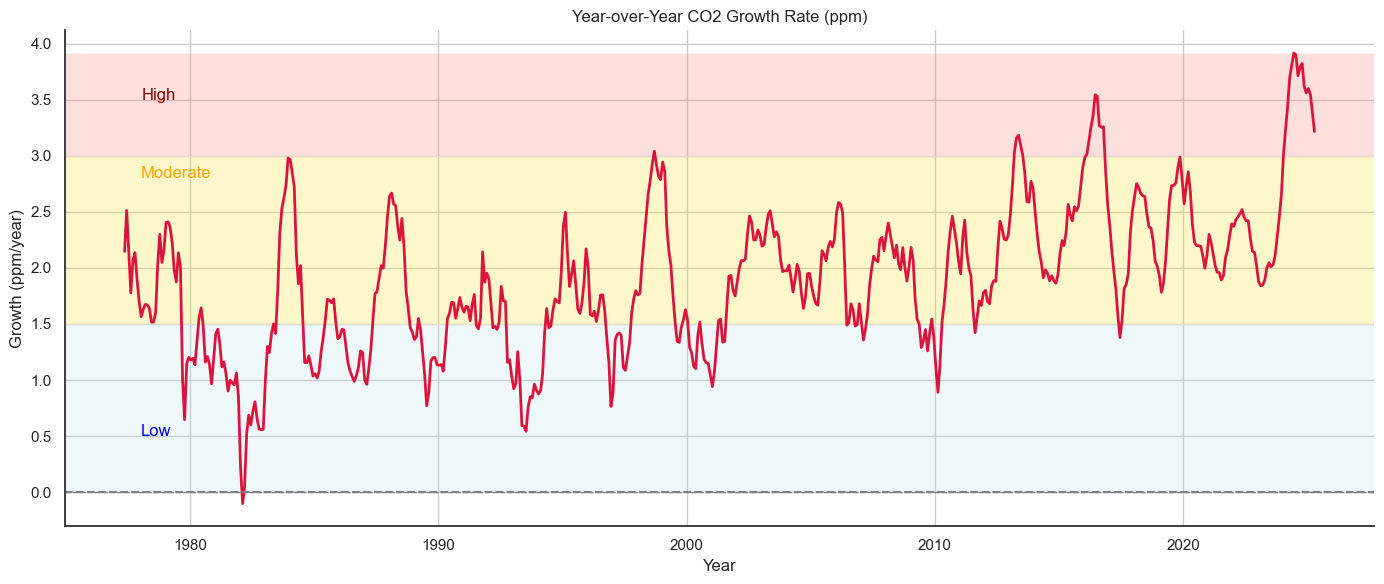

In [142]:
# define some terms
df['co2_growth'] = df['co2_ppm'].diff(12)  # Year-over-year ppm growth
df['month'] = df.index.month
df['year'] = df.index.year
df['decade'] = (df['year'] // 10) * 10 # decade column

# seaborn styles
sns.set_theme(style="white")

plt.figure(figsize=(14, 6))
ax = sns.lineplot(x=df.index, y='co2_growth', data=df, color='crimson', linewidth=2)

# Background fill by growth level
ax.axhspan(0, 1.5, facecolor='lightblue', alpha=0.2)
ax.axhspan(1.5, 3, facecolor='gold', alpha=0.2)
ax.axhspan(3, df['co2_growth'].max(), facecolor='salmon', alpha=0.25)

# Annotate background meaning
ax.text(df.index[20], 0.5, "Low", color='blue')
ax.text(df.index[20], 2.8, "Moderate", color='orange')
ax.text(df.index[20], 3.5, "High", color='darkred')

# Plotting the CO2 growth rate
sns.despine()
ax.axhline(0, linestyle='--', color='gray', linewidth=1)
plt.title('Year-over-Year CO2 Growth Rate (ppm)')
plt.xlabel('Year')
plt.ylabel('Growth (ppm/year)')
plt.axhline(0, linestyle='--', color='grey')
plt.grid(True)
plt.tight_layout()
plt.show()

## CO₂ Growth Rate Analysis

This visualization examines the year-over-year growth rate of atmospheric CO₂, providing critical insights into how rapidly carbon dioxide concentrations are increasing:

- **Accelerating Change**: The growth rate shows a concerning upward trend over time, with recent periods showing significantly higher average growth rates compared to earlier decades.

- **Category Thresholds**: The color-coded background helps contextualize the severity of growth rates:
  - Low (blue): < 1.5 ppm/year - levels typically seen in earlier decades
  - Moderate (yellow): 1.5-3 ppm/year - increasingly common in recent decades
  - High (salmon): > 3 ppm/year - alarming growth rates seen in recent years

- **Volatility**: The pronounced spikes and dips in the growth rate reflect various factors:
  - Global economic cycles (recessions often temporarily reduce emissions)
  - Major climate events like El Niño/La Niña (affecting natural carbon sinks)
  - Changes in land use, deforestation, and industrial activities

- **Recent Trends**: The frequency of growth rates entering the "high" category has increased substantially in recent years, suggesting that CO₂ is accumulating in the atmosphere at an accelerating pace despite international mitigation efforts.

This growth rate visualization provides a more sensitive indicator of change than absolute concentration, highlighting periods of acceleration that demand attention from policymakers.

# Conclusion: Cape Grim CO₂ Analysis Key Takeaways

The Cape Grim atmospheric CO₂ dataset provides a sobering picture of our changing atmosphere. Our analysis of this high-quality, long-term monitoring data reveals several crucial insights:

## 1. Accelerating Long-Term Trend

Perhaps the most alarming finding is that atmospheric CO₂ is not just increasing but accelerating in its growth rate. The data shows a clear, unambiguous upward trajectory that has steepened over time, with each decade showing higher average concentrations than the last. This acceleration is particularly evident in recent decades, with growth rates increasingly falling into the "moderate" and "high" categories.

This acceleration occurs despite increasing global awareness and climate agreements, suggesting that current mitigation efforts are insufficient to stabilize atmospheric carbon dioxide levels.

## 2. Seasonal Cycles Within Persistent Increase

Our analysis reveals the fascinating interplay between seasonal variation and long-term trends. The planet's natural "breathing" pattern is clearly visible in the monthly data, with CO₂ levels dropping during Northern Hemisphere summer when plant photosynthesis is at its peak, and rising during winter months when vegetation is dormant.

However, this natural cycle occurs entirely within the context of an ever-increasing baseline. Each year's minimum CO₂ level is typically higher than the previous year's maximum, emphasizing that seasonal fluctuations provide no relief from the persistent upward trend.

## 3. Implications for Climate Policy

The growth rate visualization provides perhaps the most actionable insights for policymakers. The increasing frequency of high growth rate periods (>3 ppm/year) should serve as an urgent warning signal that demands stronger mitigation strategies. 

Particularly concerning is that despite technological advances in renewable energy, increased efficiency standards, and growing climate awareness, the rate of atmospheric CO₂ accumulation continues to accelerate rather than stabilize or decrease.

These findings underscore the need for transformative rather than incremental approaches to reducing carbon emissions if we hope to stabilize atmospheric CO₂ concentrations and mitigate the most severe impacts of climate change.